___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
sns.set_style('darkgrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [5]:
ad_data = pd.read_csv('advertising.csv')

In [6]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

**Create a histogram of the Age**

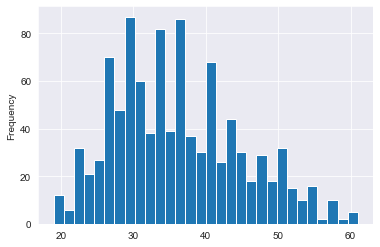

In [8]:
ad_data['Age'].plot.hist(bins=30)
# OR
# ad_data.plot(y='Age', kind='hist', bins=30)
# OR
# ad_data['Age'].hist(bins=30)
# OR
# sns.distplot(ad_data['Age'], bins=30)

**Create a jointplot showing Area Income versus Age.**

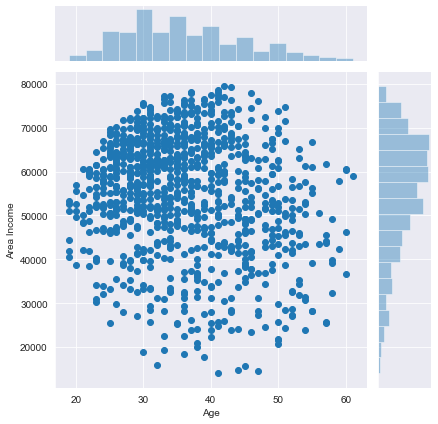

In [9]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

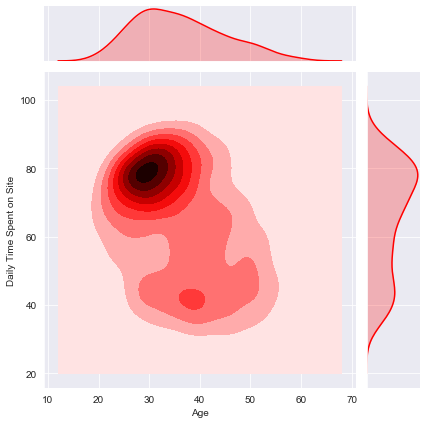

In [10]:
sns.jointplot(y='Daily Time Spent on Site', x='Age', data=ad_data, kind='kde', color='red')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

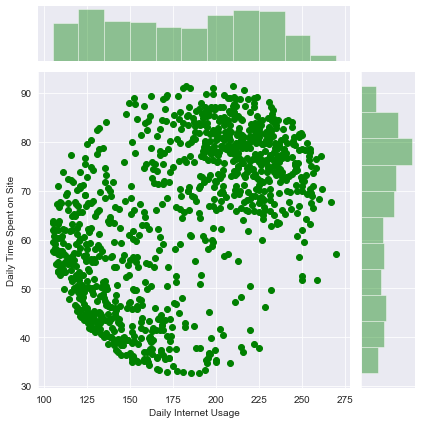

In [11]:
sns.jointplot(y='Daily Time Spent on Site', x='Daily Internet Usage', data=ad_data, color='green')

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

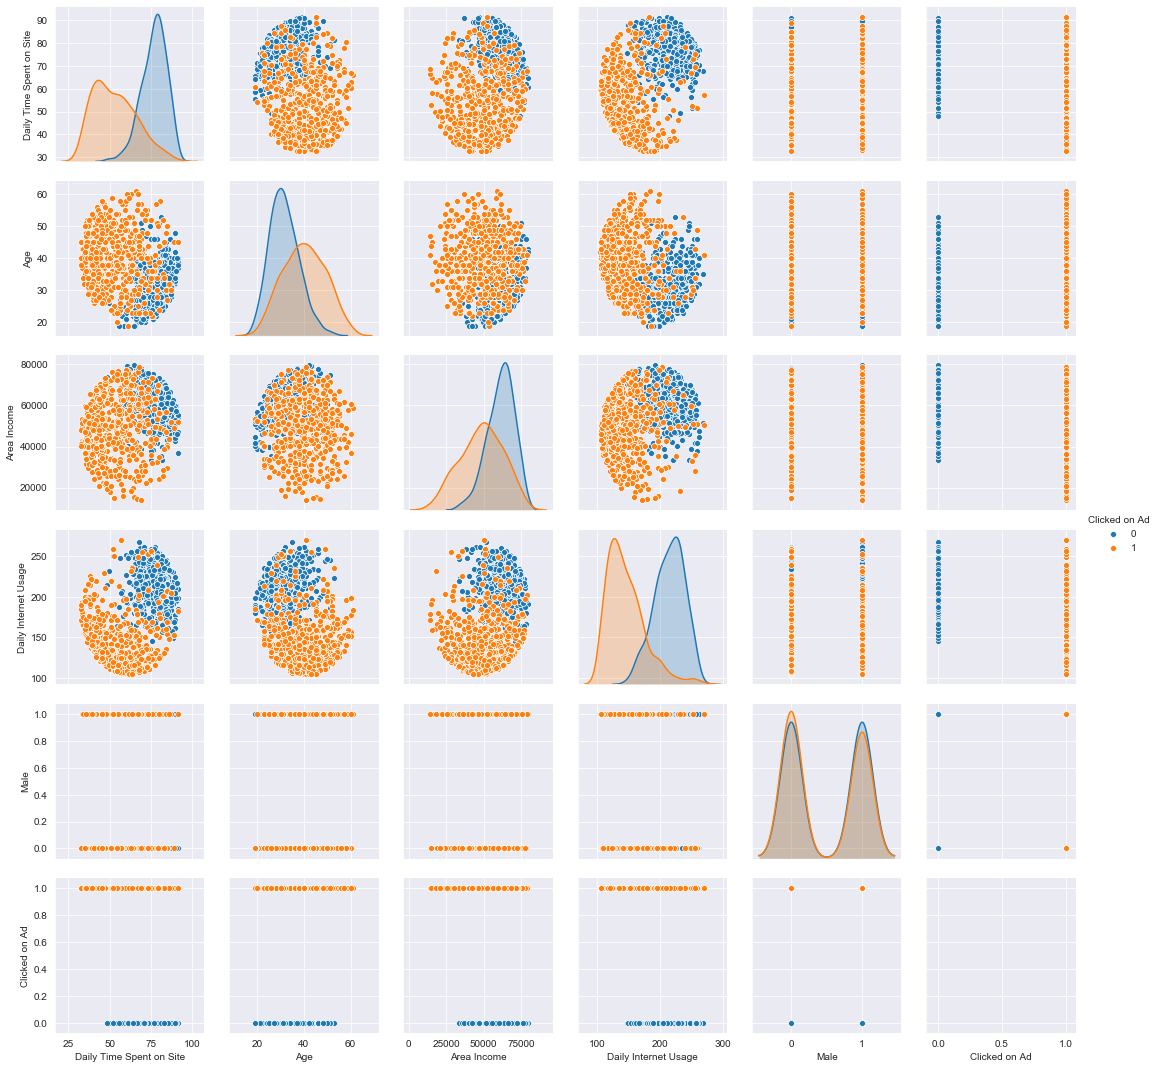

In [12]:
sns.pairplot(data=ad_data, hue='Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [14]:
# For the first attempt, using all fields (with numeric data).

In [15]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
Y = ad_data['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
logm = LogisticRegression()
logm.fit(x_train, y_train)
predictions = logm.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       164
           1       0.84      0.97      0.90       136

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300



In [17]:
# From the kde pairplot in the EDA section, we can see that being male
# or female doesn't matter that much. Therefore, training model without
# the 'Male' data to see if that improves the accuracy.

In [18]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
Y = ad_data['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [19]:
logm = LogisticRegression()
logm.fit(x_train, y_train)
predictions = logm.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       154
           1       0.88      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [20]:
# The accuracy improves slightly.

In [21]:
# After some trial and error, noticed that the model
# worked better without 'Area Income'...

In [22]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']]
Y = ad_data['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [23]:
logm = LogisticRegression()
logm.fit(x_train, y_train)
predictions = logm.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       158
           1       0.93      0.97      0.95       142

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [24]:
# The accuracy further improved, and by a good amount!
# This could be because the income values are very high
# compared to the other features. Therefore, checking if
# normalizing the income yields the same/better results.

In [25]:
# Creating a function to apply mean normalization
# to the Area Income data.
mean_income = np.mean(ad_data['Area Income'])
income_std = np.std(ad_data['Area Income'])
    
    
def normalize_income(area_income):
    return (area_income - mean_income)/income_std

In [26]:
ad_data['Area Income'] = ad_data['Area Income'].apply(normalize_income)

In [27]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
Y = ad_data['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [28]:
logm = LogisticRegression()
logm.fit(x_train, y_train)
predictions = logm.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94       159
           1       0.90      0.99      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300



## Great Job!